In [100]:
### SVM Classfication:-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC

In [80]:
train=pd.read_csv("D:\Excel R\Assignments\Assignment 17\SalaryData_Train(1).csv")
test=pd.read_csv("D:\Excel R\Assignments\Assignment 17\SalaryData_Test(1).csv")

In [81]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [82]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [84]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [85]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [87]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='count'>

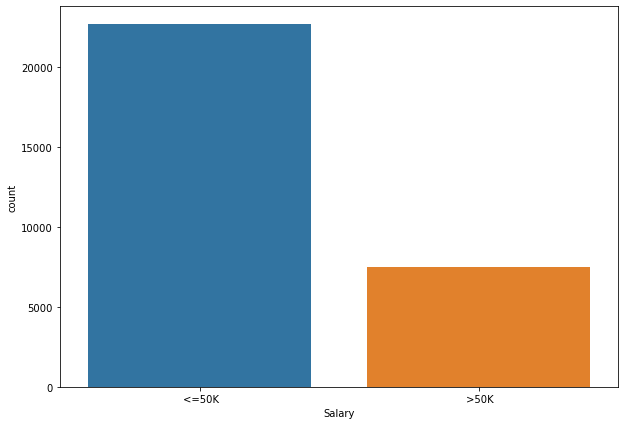

In [89]:
### Countplots:-
plt.figure(figsize=(10,7))
sns.countplot(x=train['Salary'],data=train)

<AxesSubplot:xlabel='Salary', ylabel='count'>

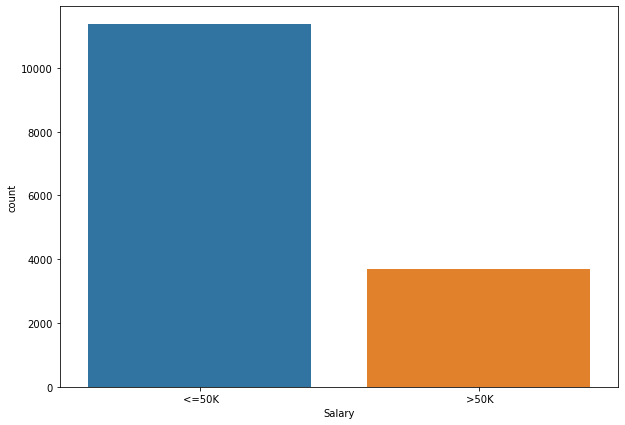

In [91]:
plt.figure(figsize=(10,7))
sns.countplot(x=test['Salary'],data=test)

<AxesSubplot:xlabel='education'>

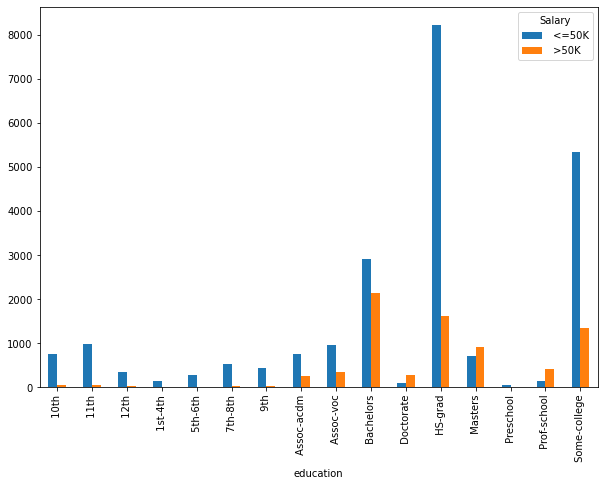

In [94]:
pd.crosstab(train['education'],train['Salary']).plot(kind='bar',figsize=(10,7))

<AxesSubplot:xlabel='education'>

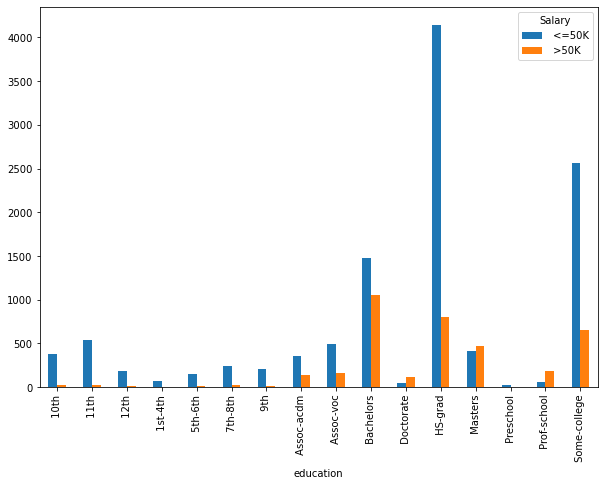

In [95]:
pd.crosstab(test['education'],test['Salary']).plot(kind='bar',figsize=(10,7))

<AxesSubplot:xlabel='maritalstatus'>

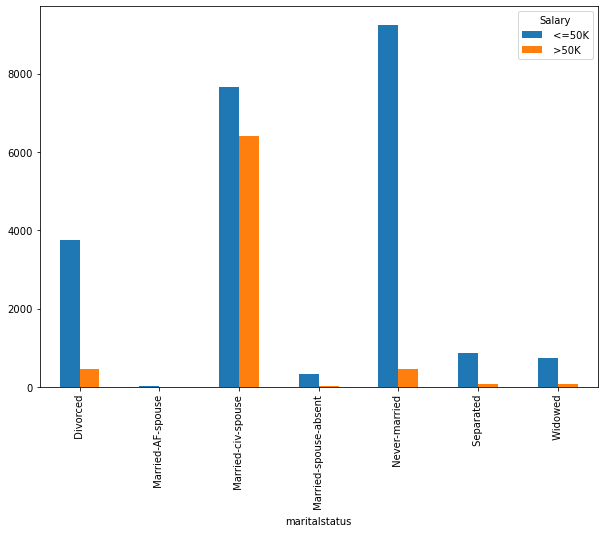

In [96]:
pd.crosstab(train['maritalstatus'],train['Salary']).plot(kind='bar',figsize=(10,7))

<AxesSubplot:xlabel='maritalstatus'>

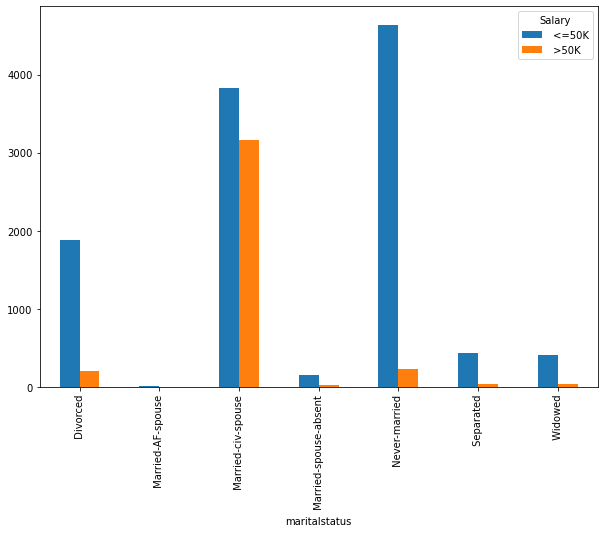

In [97]:
pd.crosstab(test['maritalstatus'],test['Salary']).plot(kind='bar',figsize=(10,7))

In [99]:
obj=['workclass','education','educationno','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native','Salary']
train[obj]=train[obj].astype('category')
test[obj]=test[obj].astype('category')

In [101]:
train[obj]=train[obj].apply(LabelEncoder().fit_transform)
test[obj]=test[obj].apply(LabelEncoder().fit_transform)

In [102]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,12,4,0,1,4,1,24,0,39,37,0
1,50,4,9,12,2,3,0,4,1,0,0,12,37,0
2,38,2,11,8,0,5,1,4,1,0,0,39,37,0
3,53,2,1,6,2,5,0,2,1,0,0,39,37,0
4,28,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,11,2,12,5,4,0,0,0,37,37,0
30157,40,2,11,8,2,6,0,4,1,0,0,39,37,1
30158,58,2,11,8,6,0,4,4,0,0,0,39,37,0
30159,22,2,11,8,4,0,3,4,1,0,0,19,37,0


In [103]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,6,4,6,3,2,1,0,0,39,37,0
1,38,2,11,8,2,4,0,4,1,0,0,49,37,0
2,28,1,7,11,2,10,0,4,1,0,0,39,37,1
3,44,2,15,9,2,6,0,2,1,87,0,39,37,1
4,34,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,39,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,38,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,44,2,9,12,0,0,3,1,1,73,0,39,37,0


### For algorithm purposes, we're taking less no. of data here:-

In [104]:
x_train=train.iloc[500:1000,0:13]
y_train=train.iloc[500:1000,13]
x_test=test.iloc[100:200,0:13]
y_test=test.iloc[100:200,13]

## Algorithm for the best parameters:-

In [106]:
clf=SVC()
param_grid=[{'kernel':['rbf'], 'gamma':[50,10,5,0.5,0.1], 'C':[30,25,20,15,10,0.5,0.1]}]
gsv_rbf=GridSearchCV(clf,param_grid, cv=10)
gsv_rbf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [30, 25, 20, 15, 10, 0.5, 0.1],
                          'gamma': [50, 10, 5, 0.5, 0.1], 'kernel': ['rbf']}])

In [107]:
print(gsv_rbf.best_params_ , gsv_rbf.best_score_)

{'C': 30, 'gamma': 50, 'kernel': 'rbf'} 0.74


## Building the model with the best parameters:-

In [108]:
x_train=train.iloc[:,0:13]
y_train=train.iloc[:,13]
x_test=test.iloc[:,0:13]
y_test=test.iloc[:,13]

In [109]:
clf=SVC(C=30, gamma=0.5, kernel='rbf')
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test, y_pred)*100
print('Accuracy:-', acc)
confusion_matrix(y_test, y_pred)

Accuracy:- 76.41434262948206


array([[10762,   598],
       [ 2954,   746]], dtype=int64)

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     11360
           1       0.56      0.20      0.30      3700

    accuracy                           0.76     15060
   macro avg       0.67      0.57      0.58     15060
weighted avg       0.73      0.76      0.72     15060

